In [1]:
from mpl_toolkits.basemap import Basemap, cm, shiftgrid
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
#import pylab as plt
import matplotlib as mpl

In [2]:
filename='/Users/ben/data/aw103/mslp/aw103a.pm_1960_1999_mslp.nc'
ncfile = netCDF4.Dataset(filename, 'r')
longitude = ncfile.variables['longitude'][:]
latitude = ncfile.variables['latitude'][:]
pressure = ncfile.variables['p_1'][:]

In [3]:
monthofmax = np.zeros((len(latitude), len(longitude)))
indexlist = []

for ilat in range(0, len(latitude)):
    for ilon in range (0, len(longitude)):
        if (np.argmax(pressure[0:12,0, ilat, ilon]) == 0) or\
        (np.argmax(pressure[0:12,0, ilat, ilon]) == 1) or\
        (np.argmax(pressure[0:12,0, ilat, ilon]) == 2):
                monthofmax[ilat, ilon] = 1
        elif (np.argmax(pressure[0:12,0, ilat, ilon]) == 3) or\
        (np.argmax(pressure[0:12,0, ilat, ilon]) == 4) or\
        (np.argmax(pressure[0:12,0, ilat, ilon]) == 5):
                monthofmax[ilat, ilon] = 2
        elif (np.argmax(pressure[0:12,0, ilat, ilon]) == 6) or\
        (np.argmax(pressure[0:12,0, ilat, ilon]) == 7) or\
        (np.argmax(pressure[0:12,0, ilat, ilon]) == 8):
                monthofmax[ilat, ilon] = 3
        else:
                monthofmax[ilat, ilon] = 4

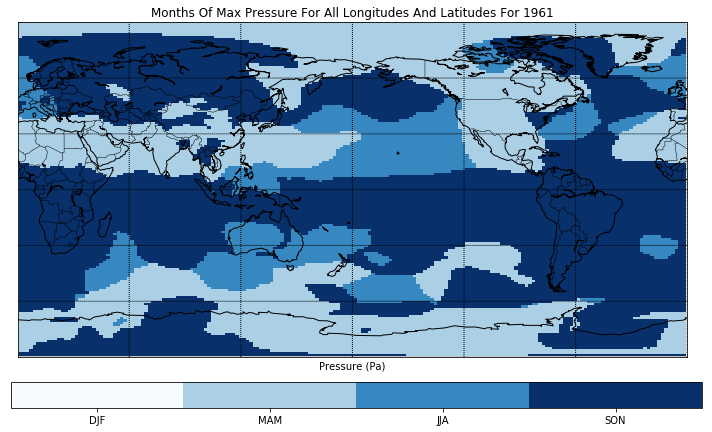

In [29]:
fig = plt.figure(figsize = (12,12))
m = Basemap(llcrnrlat=-90., urcrnrlat=90., llcrnrlon=0., urcrnrlon=360., resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
plt.title('Months Of Max Pressure For All Longitudes And Latitudes For 1961')
plt.xlabel('Pressure (Pa)')
ax1 = plt.pcolormesh(longitude, latitude, monthofmax, vmin = -0.5, vmax = 3.5,cmap=plt.cm.get_cmap('Blues', 4))
#plt.contourf(monthofmax, cmap = plt.cm.RdBu_r)
#plt.yticks('Winter', 'Spring', 'Summer', 'Autumn')
#fig.suptitle('Months Of Max Pressure For All Longitudes And Latitudes For 1961')
cbaxes = fig.add_axes([0.117, 0.25, 0.8, 0.03]) 
cb = plt.colorbar(ax1, cax = cbaxes, orientation='horizontal')  
#cbar = plt.colorbar(orientation = 'vertical',fraction=0.1)#,anchor=(0,0.0))
cb.set_ticks([0,1,2,3])
cb.set_ticklabels(['DJF','MAM','JJA','SON'])
plt.savefig("/Users/ben/Desktop/Months Of Max Pressure For All Longitudes And Latitudes For 1961.png")
#plt.clim(-0.5, 5.5)

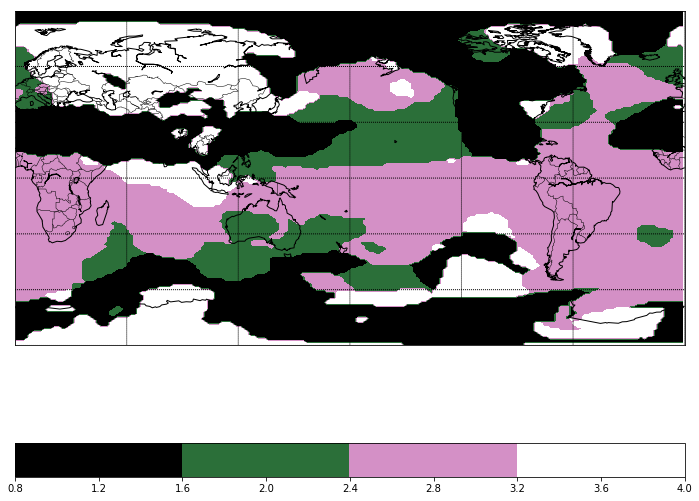

In [5]:
plt.figure(figsize = (12,12))
m = Basemap(llcrnrlat=-90., urcrnrlat=90., llcrnrlon=0., urcrnrlon=360., resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
plt.contourf(longitude, latitude, monthofmax, cmap=plt.cm.get_cmap('cubehelix', 4))
#plt.contourf(monthofmax, cmap = plt.cm.RdBu_r)
#plt.yticks('Winter', 'Spring', 'Summer', 'Autumn')
cbar = plt.colorbar(orientation = 'horizontal')
# cbar.set_ticks([0,1,2,3])
# cbar.set_ticklabels(['A','B','C','D'])
#plt.clim(-0.5, 5.5)

In [6]:
pressuredeviation = np.zeros((len(latitude), len(longitude)))

for nlat in range(0, len(latitude)):
    for nlon in range (0, len(longitude)):
        sd = np.std(pressure[:,0, nlat, nlon])
        pressuredeviation[nlat, nlon] = sd
    

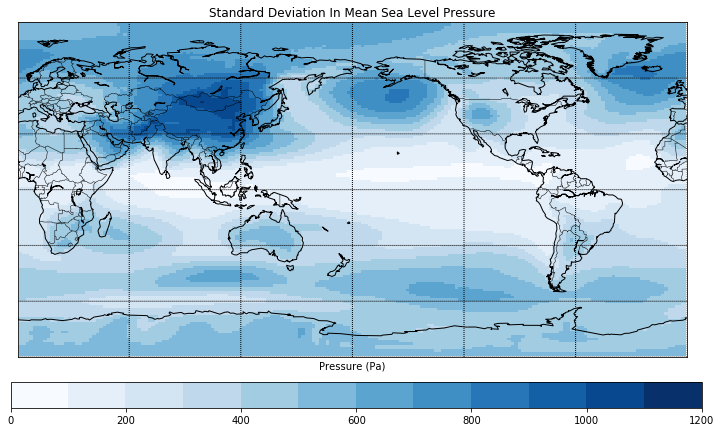

In [30]:
fig2 = plt.figure(figsize = (12,12))
m = Basemap(llcrnrlat=-90., urcrnrlat=90., llcrnrlon=0., urcrnrlon=360., resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
ax2 = plt.pcolormesh(longitude, latitude, pressuredeviation, vmin = 0., vmax = 1200., cmap=plt.cm.get_cmap('Blues', 12))
plt.title("Standard Deviation In Mean Sea Level Pressure")
plt.xlabel("Pressure (Pa)")
ccaxes = fig2.add_axes([0.117, 0.25, 0.8, 0.03]) 
cc = plt.colorbar(ax2, cax = ccaxes, orientation='horizontal')
plt.savefig("/Users/ben/Desktop/Standard Deviation In Mean Sea Level Pressure.png")

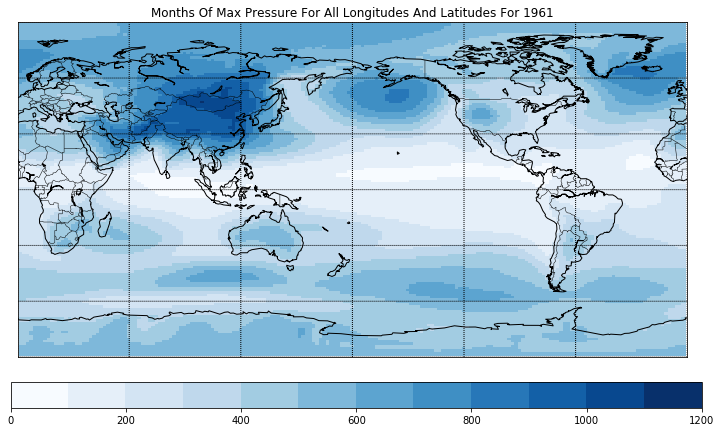

In [21]:
fig = plt.figure(figsize = (12,12))
m = Basemap(llcrnrlat=-90., urcrnrlat=90., llcrnrlon=0., urcrnrlon=360., resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
plt.title('Months Of Max Pressure For All Longitudes And Latitudes For 1961')
ax1 = plt.pcolormesh(longitude, latitude, pressuredeviation, vmin = 0, vmax = 1200.,cmap=plt.cm.get_cmap('Blues', 12))
cbaxes = fig.add_axes([0.117, 0.25, 0.8, 0.03]) 
